In [1]:
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Right_leg.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-177.15,-176.09,-136.90,-231.26,0.0,0.0,0.0,23:48:10.771
7,1,-167.03,-165.72,-124.81,-220.07,0.0,0.0,0.0,23:48:10.785
8,2,-171.47,-172.58,-127.16,-221.88,0.0,0.0,0.0,23:48:10.785
9,3,-176.79,-176.98,-132.53,-233.66,0.0,0.0,0.0,23:48:10.800
10,4,-172.26,-175.16,-132.87,-226.08,0.0,0.0,0.0,23:48:10.800


## Time Domain Analysis

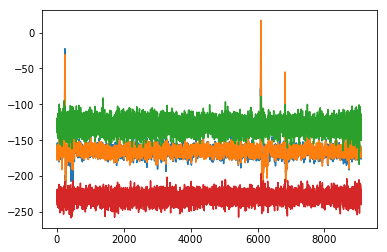

In [5]:
plt.plot(data['c1'])
plt.plot(data['c2'])
plt.plot(data['c3'])
plt.plot(data['c4'])
plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(9094, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(8850, 4)

In [9]:
X

array([[-113.42, -112.77, -139.66, -236.43],
       [-129.06, -125.62, -120.41, -223.03],
       [-141.24, -137.2 , -116.12, -222.58],
       ..., 
       [-170.85, -166.32, -148.69, -239.79],
       [-167.66, -160.11, -134.57, -228.01],
       [-164.43, -166.68, -131.03, -226.33]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

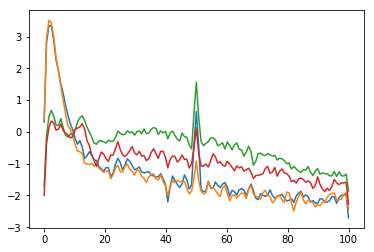

In [12]:
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1))

## Spectrogram Analysis

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

The primary motor cortex, or M1, is one of the principal brain areas involved in motor function. M1 is located in the frontal lobe of the brain, along a bump called the precentral gyrus. 

<br>
<img src=https://qph.fs.quoracdn.net/main-qimg-e16a33548b285152409e11eca5c4df73 width=600>

Frontal Lobe Location

<br>
<img src=https://static1.squarespace.com/static/52f3cf45e4b052b2dabf9b7f/t/52f6c093e4b0b19928bff551/1391902868181/FrontalLobes145753472.jpg?format=1500w width=500>

In [13]:
data.shape

(9094, 9)

In [14]:
X = np.array(data.ix[250:, 1:5])
X.shape

(8850, 4)

In [15]:
sig = X[:, 0]

In [16]:
sig.shape

(8850,)

### Channel 1

In [17]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [18]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

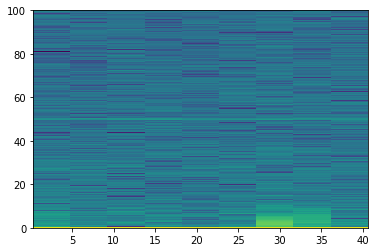

In [19]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 2

In [20]:
sig = X[:, 1]

In [21]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [22]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

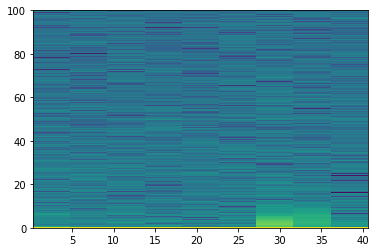

In [23]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 3

In [24]:
sig = X[:, 2]

In [25]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [26]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

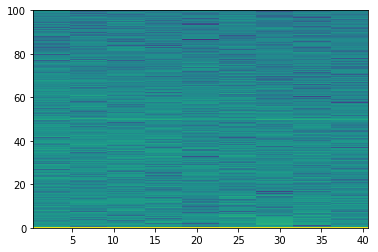

In [27]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 4

In [28]:
sig = X[:, 3]

In [29]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [30]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

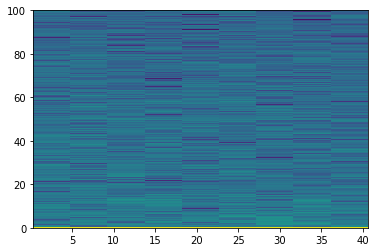

In [31]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

#### As expected, there is significant activity in channel 1 and 2, 30 seconds into the experiment. These channels capture EEG signals in the frontal lobe of the brain, which is associated with motor activity (leg movement). 

- https://www.quora.com/What-part-of-the-brain-controls-leg-movement


#### These waves are in the alpha-beta range since "the subjects were actively engaged in a task (alert), but the task was simple and likely kind of boring (relaxed)"

- https://biology.stackexchange.com/questions/43284/brain-wave-and-motor-movement-correlation

# Noise Reduction Filters

## Butterworth Filter

filter from 5 to 35 Hz, helps remove 60Hz noise and replicates paper also helps remove the DC line noise (baseline drift). 125 is half the sampling rate (250Hz/2).

In [162]:
b, a = signal.butter(4, (2.0/125, 35.0/125), btype='bandpass') 
b, a

(array([ 0.01222321,  0.        , -0.04889285,  0.        ,  0.07333928,
         0.        , -0.04889285,  0.        ,  0.01222321]),
 array([  1.        ,  -5.71974179,  14.41372236, -21.04755049,
         19.59013879, -11.93007722,   4.63594027,  -1.04851038,   0.10608002]))

In [163]:
sig_f = signal.lfilter(b, a, X, axis=0)

In [164]:
X.shape, sig_f.shape

((8850, 4), (8850, 4))

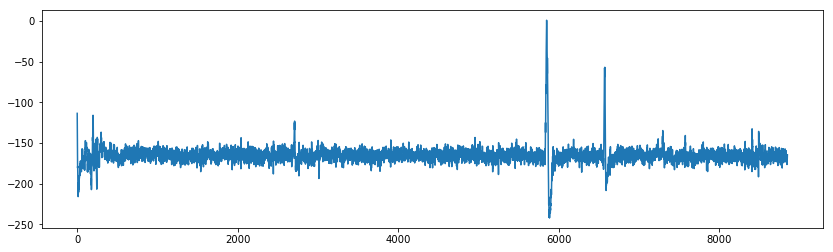

In [165]:
plt.figure(figsize=(14, 4))
plt.plot(X[:, 0]) 

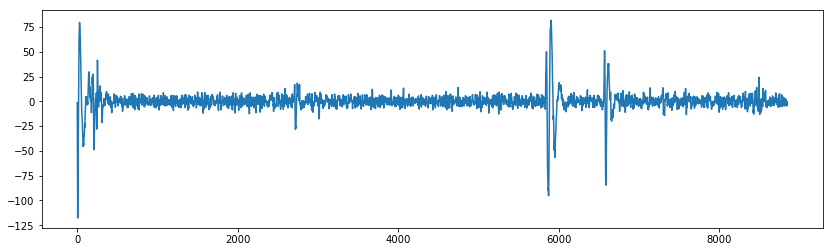

In [166]:
plt.figure(figsize=(14, 4))
plt.plot(sig_f[:, 0]) 

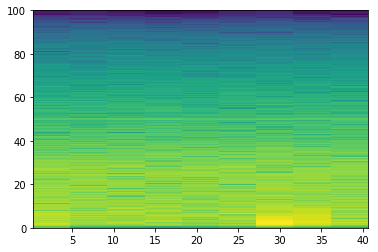

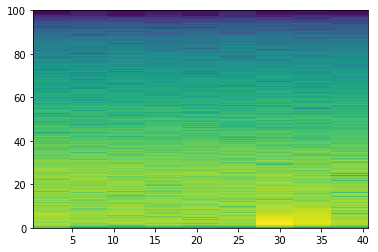

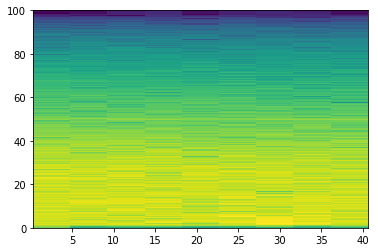

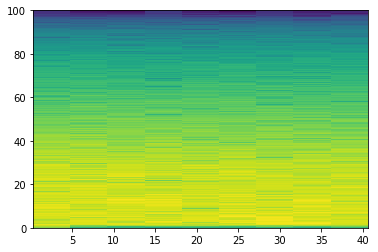

In [167]:
for i in range(0,4):
    plt.specgram(sig_f[:, i], NFFT=1024, Fs=200.0)
    plt.show()

## Welch Filter

In [170]:
b, a = signal.butter(8, (6.5/100.0, 40.0/100), btype='bandpass')
sig_f = signal.lfilter(b, a, X[:,0])[1000:]

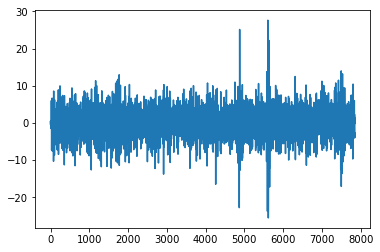

In [171]:
plt.plot(sig_f)

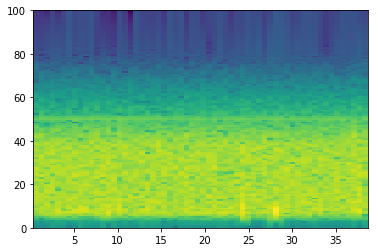

In [173]:
_ = plt.specgram(sig_f, Fs=200.0, NFFT=256, noverlap=128)